<a href="https://colab.research.google.com/github/20hnu/ml_projects/blob/main/Regression_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import zipfile
zip_ref = zipfile.ZipFile("/content/archive.zip",'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
import numpy as np
import pandas as pd

In [16]:
df = pd.read_csv("/content/Admission_Predict_Ver1.1.csv")

In [17]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(500, 9)

In [21]:
df.drop(columns = ["Serial No."], inplace=True)

In [22]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [23]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [25]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=32)

In [28]:
# use minmax scaling when you the upper and lower bound of your data  else use standardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Use fit_transform on the training data to fit the scaler and transform the training data.
#Use transform on the test data to apply the same scaling parameters learned from the training data to the test data without refitting the scaler.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
X_test_scaled[0]

array([0.16      , 0.21428571, 0.25      , 0.125     , 0.375     ,
       0.11029412, 1.        ])

In [31]:
from keras.layers import Dense

In [42]:
model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear')) #always use linear activation function for regression

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model.compile(loss="mse",optimizer="adam")

In [51]:
history = model.fit(X_train_scaled,y_train,epochs = 100,validation_split = 0.2)

Epoch 1/100
10/10 [==============================] - 0s 22ms/step - loss: 0.0068 - val_loss: 0.0101
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0068 - val_loss: 0.0099
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0066 - val_loss: 0.0097
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0066 - val_loss: 0.0094
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - val_loss: 0.0095
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0064 - val_loss: 0.0094
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0063 - val_loss: 0.0094
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0062 - val_loss: 0.0092
Epoch 9/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0061 - val_loss: 0.0092
Epoch 10/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0061 - val_loss: 0.0090
Epoch 11

In [52]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [53]:
#Accuracy score is used for classification tasks with categorical labels.
#R2 score is used for regression tasks with continuous target variables.
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6975809101079009

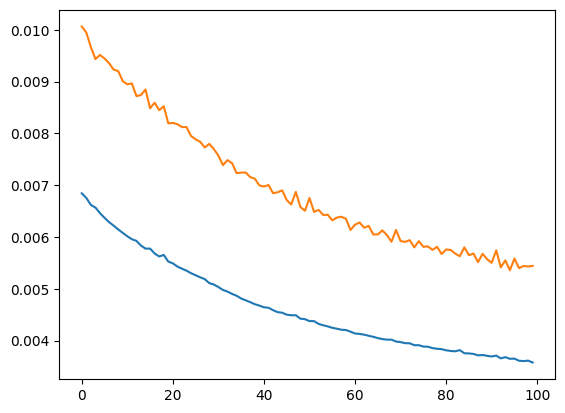

In [54]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
